In [1]:
import numpy as np
import pandas as pd
from scipy.special import softmax
from scipy.stats import pointbiserialr
from ast import literal_eval
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.pyplot import savefig
from matplotlib.ticker import FormatStrFormatter
%matplotlib inline

import seaborn as sns
sns.set_style("ticks")
sns.set_context(context='paper',font_scale=1.2)
sns.despine()

import yaml
import os
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')

<Figure size 432x288 with 0 Axes>

In [2]:
model_path = '/local-scratch/nigam/projects/jlemmon/cl-clmbr/experiments/main/artifacts/models/clmbr'
results_path = '/local-scratch/nigam/projects/jlemmon/cl-clmbr/experiments/main/artifacts/results'
figure_path = '/local-scratch/nigam/projects/jlemmon/cl-clmbr/experiments/main/notebooks/figures'

In [4]:
tv_df = pd.read_csv(f'{model_path}/contrastive_learn/models/gru_sz_800_do_0.1_cd_0_dd_0_lr_0.001_l2_0.01/bs_2000_lr_3e-5_temp_0.01_pool_trivial/val_preds.csv')
preds = list(tv_df['preds'])
l = []
for p in preds:
    s = ' '.join(p.split())
    s = s.replace('[ ','')
    s = s.replace('[','')
    s = s.replace('   ',' ')
    s = s.replace('  ',' ')
    s = s.replace(' ]','')
    s = s.replace(']','')
    s = s.replace('\n', '')
    s = s.split(' ')
    s = [float(x) for x in s]
    l.append(softmax(s))
tv_df['preds'] = l
bin_lbls = []
logits = []
preds = list(tv_df['preds'])
lbls = list(tv_df['labels'])

for i, p in enumerate(preds):
    logit = np.amax(p)
    logits.append(logit)
    lbl = np.argmax(p)
    if lbl == lbls[i]:
        bin_lbls.append(1)
    else:
        bin_lbls.append(0)
tv_df['bin_lbl'] = bin_lbls
tv_df['bin_logit'] = logits

In [6]:
rd_df = pd.read_csv(f'{model_path}/contrastive_learn/models/gru_sz_800_do_0.1_cd_0_dd_0_lr_0.001_l2_0.01/bs_3000_lr_5e-5_temp_0.01_pool_rand_day/val_preds.csv')
preds = list(rd_df['preds'])
l = []
for p in preds:
    s = ' '.join(p.split())
    s = s.replace('[ ','')
    s = s.replace('[','')
    s = s.replace('   ',' ')
    s = s.replace('  ',' ')
    s = s.replace(' ]','')
    s = s.replace(']','')
    s = s.replace('\n', '')
    s = s.split(' ')
    s = [float(x) for x in s]
    l.append(softmax(s))
rd_df['preds'] = l
bin_lbls = []
logits = []
preds = list(rd_df['preds'])
lbls = list(rd_df['labels'])

for i, p in enumerate(preds):
    logit = np.amax(p)
    logits.append(logit)
    lbl = np.argmax(p)
    if lbl == lbls[i]:
        bin_lbls.append(1)
    else:
        bin_lbls.append(0)
rd_df['bin_lbl'] = bin_lbls
rd_df['bin_logit'] = logits

In [7]:
mr_df = pd.read_csv(f'{model_path}/contrastive_learn/models/gru_sz_800_do_0.1_cd_0_dd_0_lr_0.001_l2_0.01/bs_1000_lr_5e-5_temp_0.01_pool_mean_rep/val_preds.csv')
preds = list(mr_df['preds'])
l = []
for p in preds:
    s = ' '.join(p.split())
    s = s.replace('[ ','')
    s = s.replace('[','')
    s = s.replace('   ',' ')
    s = s.replace('  ',' ')
    s = s.replace(' ]','')
    s = s.replace(']','')
    s = s.replace('\n', '')
    s = s.split(' ')
    s = [float(x) for x in s]
    l.append(softmax(s))
mr_df['preds'] = l
bin_lbls = []
logits = []
preds = list(mr_df['preds'])
lbls = list(mr_df['labels'])

for i, p in enumerate(preds):
    logit = np.amax(p)
    logits.append(logit)
    lbl = np.argmax(p)
    if lbl == lbls[i]:
        bin_lbls.append(1)
    else:
        bin_lbls.append(0)
mr_df['bin_lbl'] = bin_lbls
mr_df['bin_logit'] = logits

In [8]:
dp_df = pd.read_csv(f'{model_path}/contrastive_learn/models/gru_sz_800_do_0.1_cd_0_dd_0_lr_0.001_l2_0.01/bs_3000_lr_5e-5_temp_0.01_pool_diff_pat/val_preds.csv')
preds = list(dp_df['preds'])
l = []
for p in preds:
    s = ' '.join(p.split())
    s = s.replace('[ ','')
    s = s.replace('[','')
    s = s.replace('   ',' ')
    s = s.replace('  ',' ')
    s = s.replace(' ]','')
    s = s.replace(']','')
    s = s.replace('\n', '')
    s = s.split(' ')
    s = [float(x) for x in s]
    l.append(softmax(s))
dp_df['preds'] = l
bin_lbls = []
logits = []
preds = list(dp_df['preds'])
lbls = list(dp_df['labels'])

for i, p in enumerate(preds):
    logit = np.amax(p)
    logits.append(logit)
    lbl = np.argmax(p)
    if lbl == lbls[i]:
        bin_lbls.append(1)
    else:
        bin_lbls.append(0)
dp_df['bin_lbl'] = bin_lbls
dp_df['bin_logit'] = logits

In [9]:
clr_df = pd.read_csv(f'{model_path}/cl_ete/models/gru_sz_800_do_0.1_cd_0_dd_0_lr_0.01_l2_0.1_bs_1000_lr_1e-5_temp_0.01_pool_mean_rep/val_preds.csv')
preds = list(clr_df['preds'])
l = []
for p in preds:
    s = ' '.join(p.split())
    s = s.replace('[ ','')
    s = s.replace('[','')
    s = s.replace('   ',' ')
    s = s.replace('  ',' ')
    s = s.replace(' ]','')
    s = s.replace(']','')
    s = s.replace('\n', '')
    s = s.split(' ')
    s = [float(x) for x in s]
    l.append(softmax(s))
clr_df['preds'] = l
bin_lbls = []
logits = []
preds = list(clr_df['preds'])
lbls = list(clr_df['labels'])

for i, p in enumerate(preds):
    logit = np.amax(p)
    logits.append(logit)
    lbl = np.argmax(p)
    if lbl == lbls[i]:
        bin_lbls.append(1)
    else:
        bin_lbls.append(0)
clr_df['bin_lbl'] = bin_lbls
clr_df['bin_logit'] = logits

In [10]:
ocp_df = pd.read_csv(f'{model_path}/ocp/models/gru_sz_800_do_0.1_l2_0.1_lr_1e-5_pool_ocp/val_preds.csv')

<AxesSubplot:>

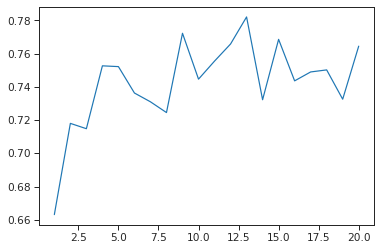

In [11]:
epochs = list(tv_df['epoch'].unique())
auroc = []
for e in epochs:
    df = tv_df.query('epoch == @e')
    preds = list(df['bin_logit'])
    lbls = list(df['bin_lbl'])
    auroc.append(roc_auc_score(lbls,preds))
sns.lineplot(list(np.arange(1,len(epochs)+1)),auroc)

<AxesSubplot:>

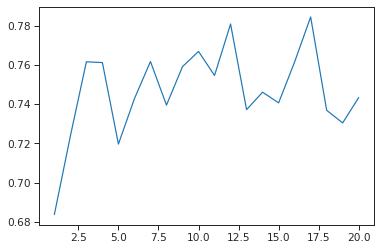

In [12]:
epochs = list(rd_df['epoch'].unique())
auroc = []
for e in epochs:
    df = rd_df.query('epoch == @e')
    preds = list(df['bin_logit'])
    lbls = list(df['bin_lbl'])
    auroc.append(roc_auc_score(lbls,preds))
sns.lineplot(list(np.arange(1,len(epochs)+1)),auroc)

In [13]:
rd_df.head()

,epoch,preds,labels,bin_lbl,bin_logit
0,0,"[0.24186876771002366, 0.2581305066814963, 6.82...",0,0,0.258131
1,0,"[0.21071205601733872, 0.28928794398266056, 3.4...",1,1,0.289288
2,0,"[0.21561847487977628, 0.28438260320720576, 1.2...",2,0,0.284383
3,0,"[0.24186861924351344, 0.2581313807564881, 6.82...",3,0,0.258131
4,0,"[0.2107116902781327, 0.28928917758679806, 3.43...",4,0,0.289289


<AxesSubplot:>

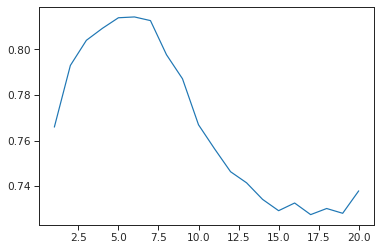

In [14]:
epochs = list(mr_df['epoch'].unique())
auroc = []
for e in epochs:
    df = mr_df.query('epoch == @e')
    preds = list(df['bin_logit'])
    lbls = list(df['bin_lbl'])
    auroc.append(roc_auc_score(lbls,preds))
sns.lineplot(list(np.arange(1,len(epochs)+1)),auroc)

<AxesSubplot:>

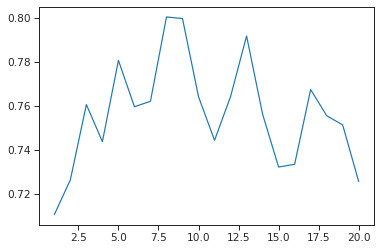

In [15]:
epochs = list(dp_df['epoch'].unique())
auroc = []
for e in epochs:
    df = dp_df.query('epoch == @e')
    preds = list(df['bin_logit'])
    lbls = list(df['bin_lbl'])
    auroc.append(roc_auc_score(lbls,preds))
sns.lineplot(list(np.arange(1,len(epochs)+1)),auroc)

<AxesSubplot:>

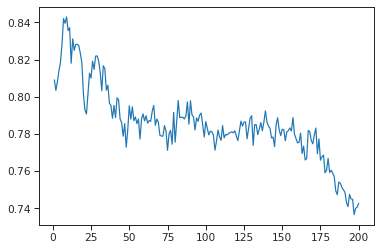

In [16]:
epochs = list(clr_df['epoch'].unique())
auroc = []
for e in epochs:
    df = clr_df.query('epoch == @e')
    preds = list(df['bin_logit'])
    lbls = list(df['bin_lbl'])
    auroc.append(roc_auc_score(lbls,preds))
sns.lineplot(list(np.arange(1,len(epochs)+1)),auroc)

<AxesSubplot:>

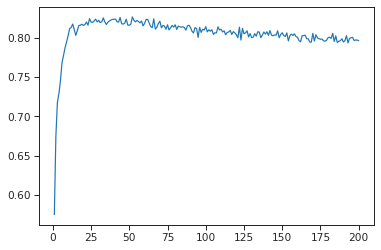

In [17]:
epochs = list(ocp_df['epoch'].unique())
auroc = []
for e in epochs:
    df = ocp_df.query('epoch == @e')
    preds = list(df['preds'])
    lbls = list(df['labels'])
    auroc.append(roc_auc_score(lbls,preds))
sns.lineplot(list(np.arange(1,len(epochs)+1)),auroc)

In [ ]:
correlation_vals = []
epochs = list(rd_df['epoch'].unique())
for e in epochs:
    df = rd_df.query('epoch == @e')
    preds = list(df['preds'])
    lbls = list(df['labels'])
    vals = []
    start_indices = [i for i in range(len(lbls)) if lbls[i] == 0]
    for i, si in enumerate(start_indices):
        if i < len(start_indices)-1:
            sim_matrix = preds[si:start_indices[i+1]]
        else:
            sim_matrix = preds[si:]
        
        id_mat = np.identity(len(sim_matrix))
        print(id_mat)
        for s in sim_matrix:
            print(s)
        id_mat = np.reshape(id_mat, (len(sim_matrix)*len(sim_matrix)))
        sim_matrix = np.reshape(sim_matrix, (len(sim_matrix)*len(sim_matrix)))
        
        v, _ = pointbiserialr(id_mat, sim_matrix)

        vals.append(v)
    correlation_vals.append(np.mean(vals))
    
    
sns.lineplot(list(np.arange(1,len(epochs)+1)),correlation_vals)

In [ ]:
correlation_vals = []
epochs = list(mr_df['epoch'].unique())
for e in epochs:
    df = mr_df.query('epoch == @e')
    preds = list(df['preds'])
    lbls = list(df['labels'])
    vals = []
    start_indices = [i for i in range(len(lbls)) if lbls[i] == 0]
    for i, si in enumerate(start_indices):
        if i < len(start_indices)-1:
            sim_matrix = preds[si:start_indices[i+1]]
        else:
            sim_matrix = preds[si:]
        
        id_mat = np.identity(len(sim_matrix))
        id_mat = np.reshape(id_mat, (len(sim_matrix)*len(sim_matrix)))
        sim_matrix = np.reshape(sim_matrix, (len(sim_matrix)*len(sim_matrix)))
        v, _ = pointbiserialr(id_mat, sim_matrix)
        vals.append(v)
    vals = [v for v in vals if np.isnan(v) == False]
    correlation_vals.append(np.mean(vals))
sns.lineplot(list(np.arange(1,len(epochs)+1)),correlation_vals)

In [ ]:
correlation_vals = []
epochs = list(dp_df['epoch'].unique())
for e in epochs:
    df = dp_df.query('epoch == @e')
    preds = list(df['preds'])
    lbls = list(df['labels'])
    vals = []
    start_indices = [i for i in range(len(lbls)) if lbls[i] == 0]
    for i, si in enumerate(start_indices):
        if i < len(start_indices)-1:
            sim_matrix = preds[si:start_indices[i+1]]
        else:
            sim_matrix = preds[si:]
        
        id_mat = np.identity(len(sim_matrix))
        id_mat = np.reshape(id_mat, (len(sim_matrix)*len(sim_matrix)))
        sim_matrix = np.reshape(sim_matrix, (len(sim_matrix)*len(sim_matrix)))
        if len(id_mat) > 2:
            v, _ = pointbiserialr(id_mat, sim_matrix)
            vals.append(v)
    vals = [v for v in vals if np.isnan(v) == False]
    correlation_vals.append(np.mean(vals))
    
sns.lineplot(list(np.arange(1,len(epochs)+1)),correlation_vals)

In [ ]:
correlation_vals = []
epochs = list(clr_df['epoch'].unique())
for e in epochs:
    df = clr_df.query('epoch == @e')
    preds = list(df['preds'])
    lbls = list(df['labels'])
    vals = []
    start_indices = [i for i in range(len(lbls)) if lbls[i] == 0]
    for i, si in enumerate(start_indices):
        if i < len(start_indices)-1:
            sim_matrix = preds[si:start_indices[i+1]]
        else:
            sim_matrix = preds[si:]
        
        id_mat = np.identity(len(sim_matrix))
        id_mat = np.reshape(id_mat, (len(sim_matrix)*len(sim_matrix)))
        sim_matrix = np.reshape(sim_matrix, (len(sim_matrix)*len(sim_matrix)))
        if len(id_mat) > 2:
            v, _ = pointbiserialr(id_mat, sim_matrix)
            vals.append(v)
    vals = [v for v in vals if np.isnan(v) == False]
    correlation_vals.append(np.mean(vals))
    
    
sns.lineplot(list(np.arange(1,len(epochs)+1)),correlation_vals)

In [ ]:
from scipy.stats import pearsonr

correlation_vals = []
epochs = list(ocp_df['epoch'].unique())
for e in epochs:
    df = ocp_df.query('epoch == @e')
    preds = list(df['preds'])
    lbls = list(df['labels'])
    
    v, _ = pointbiserialr(lbls, preds)
    correlation_vals.append(v)
    
    
sns.lineplot(list(np.arange(1,len(epochs)+1)),correlation_vals)